# Predictive Modelling for COVID-19 in Public Health
This project is in response to the COVID-19 pandemic, public health organizations have faced 
immense challenges in predicting the spread of the virus and understanding key 
factors that influence transmission and patient outcome. The organization requires actionable insight  to
inform policies, anticipate future outbreaks, and improve health resource allocation.

Going thruough the following approach
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experiment

###  Problem Definition
In Statement
> Uisng historical COVID-19 data, to conduct data cleaning, perform exploratory data analysis (EDA), and develop predictive models to forecast COVID-19 trends.
Presenting my findings through visualizations and provide a final report summarizing insights and recommendations for public health responses.

In [1]:
# Import all the tools needed
# Regular EDA(Exploratory Data Analysis) and plotting libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for the plot to appear inside the notebook
%matplotlib inline  

#Models from scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

#Models Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Data PreProcessing and Exploratory Data Analysis (EDA)

###  Data
> The original Data came from COVID-19 Open Research Dataset (CORD-19) on 
Kaggle, which includes COVID-19 case counts, demographic data, an 
various health metric https://www.kaggle.com/datasets/allen-institute-for-ai/CORD-19-research-challenge/data

The Dataset used for this project contains 35,156 rows and 10 columns. 

Here's the Data Dictionary:
- Date: Date of observation (string format).
- Country/Region: Name of the country or region.
- Confirmed: Cumulative confirmed cases.
- Deaths: Cumulative deaths.
- Recovered: Cumulative recovered cases.
- Active: Current active cases.
- New cases: New cases on a given date.
- New deaths: New deaths on a given date.
- New recovered: New recoveries on a given date.
- WHO Region: WHO-designated region.

In [2]:
# Load Data
df = pd.read_csv("C:/Users/USER/Desktop/full_grouped.csv")
df

Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
0      2020-01-22         Afghanistan          0       0          0       0   
1      2020-01-22             Albania          0       0          0       0   
2      2020-01-22             Algeria          0       0          0       0   
3      2020-01-22             Andorra          0       0          0       0   
4      2020-01-22              Angola          0       0          0       0   
...           ...                 ...        ...     ...        ...     ...   
35151  2020-07-27  West Bank and Gaza      10621      78       3752    6791   
35152  2020-07-27      Western Sahara         10       1          8       1   
35153  2020-07-27               Yemen       1691     483        833     375   
35154  2020-07-27              Zambia       4552     140       2815    1597   
35155  2020-07-27            Zimbabwe       2704      36        542    2126   

       New cases  New deaths  New recovered             WHO Region  
0              0           0              0  Eastern Mediterranean  
1              0           0              0                 Europe  
2              0           0              0                 Africa  
3              0           0              0                 Europe  
4              0           0              0                 Africa  
...          ...         ...            ...                    ...  
35151        152           2              0  Eastern Mediterranean  
35152          0           0              0                 Africa  
35153         10           4             36  Eastern Mediterranean  
35154         71           1            465                 Africa  
35155        192           2             24                 Africa  

[35156 rows x 10 columns]

In [4]:
df.shape

(35156, 10)

In [4]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [8]:
# Are there any missing value?
df.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [9]:
df.describe()

Confirmed         Deaths     Recovered        Active    New cases  \
count  3.515600e+04   35156.000000  3.515600e+04  3.515600e+04  35156.00000   
mean   2.356663e+04    1234.068239  1.104813e+04  1.128443e+04    469.36375   
std    1.499818e+05    7437.238354  6.454640e+04  8.997149e+04   3005.86754   
min    0.000000e+00       0.000000  0.000000e+00 -2.000000e+00      0.00000   
25%    1.000000e+00       0.000000  0.000000e+00  0.000000e+00      0.00000   
50%    2.500000e+02       4.000000  3.300000e+01  8.500000e+01      2.00000   
75%    3.640250e+03      78.250000  1.286250e+03  1.454000e+03     75.00000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  77255.00000   

         New deaths  New recovered  
count  35156.000000   35156.000000  
mean      18.603339     269.315593  
std      115.706351    2068.063852  
min    -1918.000000  -16298.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        1.000000      20.000000  
max     3887.000000  140050.000000

## The Monthly Recorded Cases by WHO Region

In [26]:
# Count the number of unique countries
num_countries = df['Country/Region'].unique()
num_countries


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [10]:
df["Country/Region"].value_counts()

Country/Region
Afghanistan           188
Albania               188
Algeria               188
Andorra               188
Angola                188
                     ... 
West Bank and Gaza    188
Western Sahara        188
Yemen                 188
Zambia                188
Zimbabwe              188
Name: count, Length: 187, dtype: int64

In [3]:
# convert the date to datetime 
import datetime as dt
df["Date"] = pd.to_datetime(df["Date"])
date =df["Date"].dt.strftime('%Y-%m-%d')
date

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
35151    2020-07-27
35152    2020-07-27
35153    2020-07-27
35154    2020-07-27
35155    2020-07-27
Name: Date, Length: 35156, dtype: object

In [4]:
a = df.Date.value_counts().sort_index()
print(f"the first date is: {a.index[0]}")
print(f"the last date is: {a.index[-1]}")

the first date is: 2020-01-22 00:00:00
the last date is: 2020-07-27 00:00:00


In [5]:
## Record of Cases by WHO Region
df["WHO Region"].value_counts()

WHO Region
Europe                   10528
Africa                    9024
Americas                  6580
Eastern Mediterranean     4136
Western Pacific           3008
South-East Asia           1880
Name: count, dtype: int64

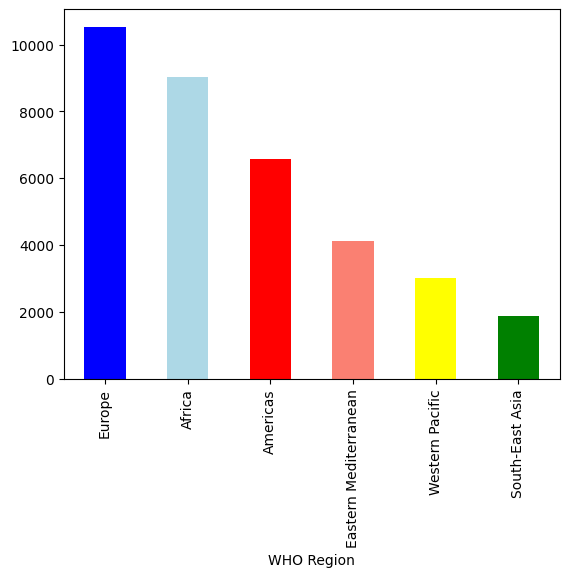

In [6]:
df["WHO Region"].value_counts().plot(kind="bar", color=["blue", "lightblue", "red", "salmon", "yellow", "green"]);

In [19]:
pd.crosstab(df["Month-str"], df["WHO Region"])

WHO Region  Africa  Americas  Eastern Mediterranean  Europe  South-East Asia  \
Month-str                                                                      
Apr           1440      1050                    660    1680              300   
Feb           1392      1015                    638    1624              290   
Jan            480       350                    220     560              100   
Jul           1296       945                    594    1512              270   
Jun           1440      1050                    660    1680              300   
Mar           1488      1085                    682    1736              310   
May           1488      1085                    682    1736              310   

WHO Region  Western Pacific  
Month-str                    
Apr                     480  
Feb                     464  
Jan                     160  
Jul                     432  
Jun                     480  
Mar                     496  
May                     496

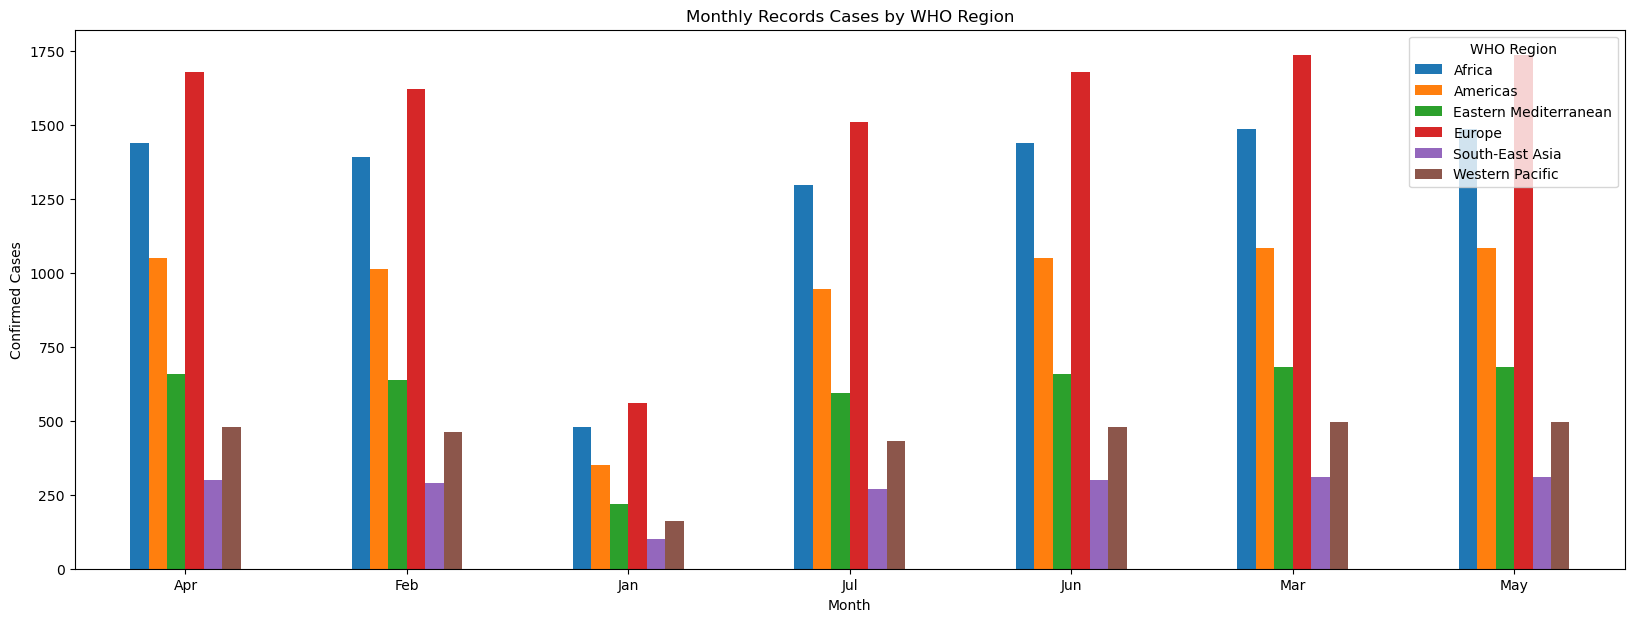

In [22]:
pd.crosstab(df["Month-str"], df["WHO Region"]).plot(kind="bar", figsize= (20, 7))
plt.title("Monthly Records Cases by WHO Region")
plt.xlabel("Month")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=0)
plt.show()

# Observation: 
##### There were 187 countries recorded cases while each country have 187 days recorded case from the month of 22nd January 2020 to 27th July 2020.

#####  6 WHO Region were recorded in the data and Europe had the highest recorded cases followed by Africa, America, Eastern Mediterranean, Western Pacific while South-East Asia had the lowest recorded cases.

## Covid 19 Confirmed and Death Cases Over Time for the Year 2022

In [24]:
Confirmed_Region = df[["Confirmed", "WHO Region"]]
Confirmed_Region.tail()

Confirmed WHO Region
35033       1137     Europe
35034     207112     Europe
35035      33624     Africa
35026       2316     Africa
35155       2704     Africa

In [12]:
Death_Region = df[["Deaths", "WHO Region"]]
Death_Region

Deaths             WHO Region
0           0  Eastern Mediterranean
1           0                 Europe
2           0                 Africa
3           0                 Europe
4           0                 Africa
...       ...                    ...
35151      78  Eastern Mediterranean
35152       1                 Africa
35153     483  Eastern Mediterranean
35154     140                 Africa
35155      36                 Africa

[35156 rows x 2 columns]

In [5]:
# Active Case = confirmed - deaths - recovered and Extraction of Month 
df['Active'] = df['Confirmed'] - df[ 'Deaths'] - df['Recovered']
df['Month'] = df['Date'].dt.month
df["Month-str"] = df["Date"].dt.strftime("%b")
df

Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
0     2020-01-22         Afghanistan          0       0          0       0   
1     2020-01-22             Albania          0       0          0       0   
2     2020-01-22             Algeria          0       0          0       0   
3     2020-01-22             Andorra          0       0          0       0   
4     2020-01-22              Angola          0       0          0       0   
...          ...                 ...        ...     ...        ...     ...   
35151 2020-07-27  West Bank and Gaza      10621      78       3752    6791   
35152 2020-07-27      Western Sahara         10       1          8       1   
35153 2020-07-27               Yemen       1691     483        833     375   
35154 2020-07-27              Zambia       4552     140       2815    1597   
35155 2020-07-27            Zimbabwe       2704      36        542    2126   

       New cases  New deaths  New recovered             WHO Region  Month  \
0              0           0              0  Eastern Mediterranean      1   
1              0           0              0                 Europe      1   
2              0           0              0                 Africa      1   
3              0           0              0                 Europe      1   
4              0           0              0                 Africa      1   
...          ...         ...            ...                    ...    ...   
35151        152           2              0  Eastern Mediterranean      7   
35152          0           0              0                 Africa      7   
35153         10           4             36  Eastern Mediterranean      7   
35154         71           1            465                 Africa      7   
35155        192           2             24                 Africa      7   

      Month-str  
0           Jan  
1           Jan  
2           Jan  
3           Jan  
4           Jan  
...         ...  
35151       Jul  
35152       Jul  
35153       Jul  
35154       Jul  
35155       Jul  

[35156 rows x 12 columns]

In [10]:
# Total Cases per Day
total_cases = df.loc[:, ['Date', 'Confirmed']].groupby('Date').sum().reset_index()
total_cases

Date  Confirmed
0   2020-01-22        555
1   2020-01-23        654
2   2020-01-24        941
3   2020-01-25       1434
4   2020-01-26       2118
..         ...        ...
183 2020-07-23   15510481
184 2020-07-24   15791645
185 2020-07-25   16047190
186 2020-07-26   16251796
187 2020-07-27   16480485

[188 rows x 2 columns]

Text(0.5, 1.0, 'Worldwide Confirmed Cases Over Time')

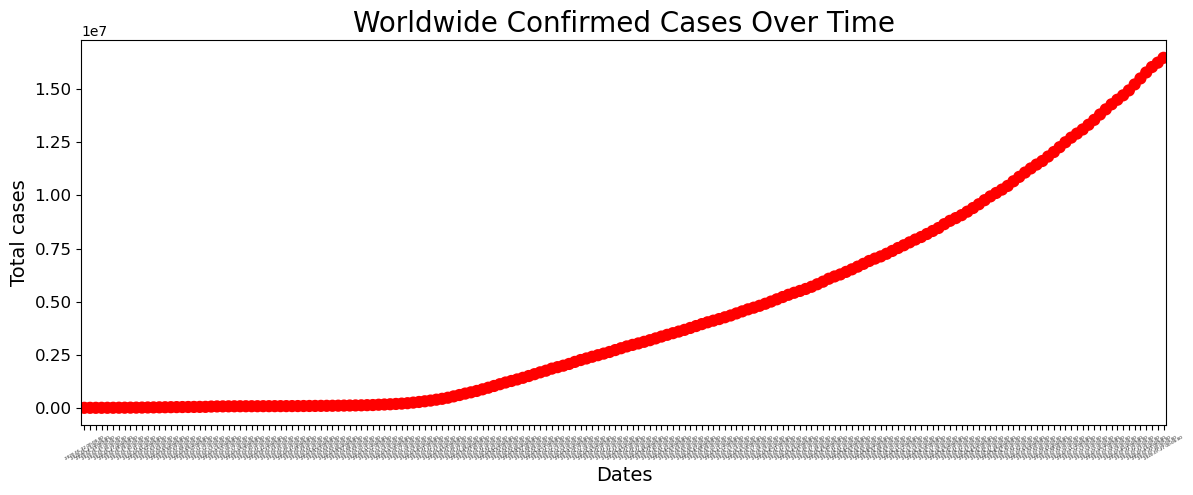

In [10]:
# Visualization for Total Cases per Day
plt.figure(figsize= (14,5))

ax = sns.pointplot(x=total_cases['Date'],
                   y=total_cases['Confirmed'],
                   color='r')
ax.set(xlabel='Dates', ylabel='Total cases')

plt.xticks(rotation=30, fontsize=3)
plt.yticks(fontsize=12)

plt.xlabel('Dates', fontsize=14)
plt.ylabel('Total cases', fontsize=14)
plt.title('Worldwide Confirmed Cases Over Time', fontsize=20)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


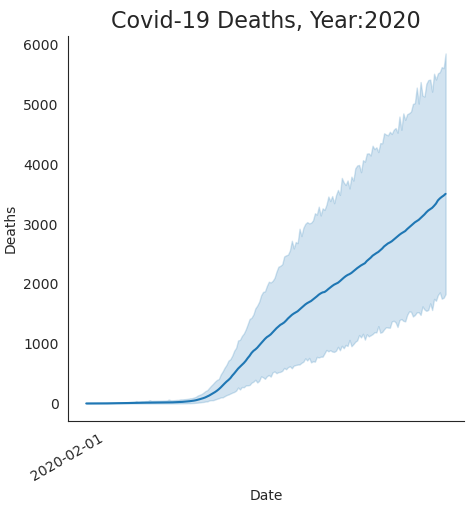

<Figure size 1000x500 with 0 Axes>

In [12]:
# Visualization for Deaths Per Day
with sns.axes_style('white'):
    
    g = sns.relplot(
        x="Date", 
        y="Deaths", 
        kind="line", 
        data=df
    )
    g.fig.autofmt_xdate()
    g.set_xticklabels(step=20)
    plt.title("Covid-19 Deaths, Year:2020", fontsize=16)
    plt.figure(figsize=(10,5))

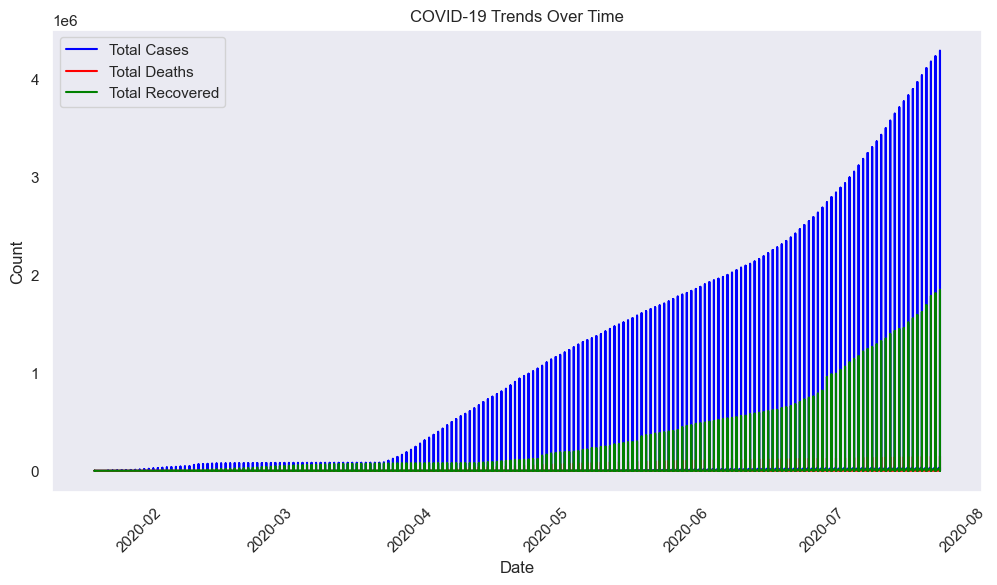

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Confirmed'], label='Total Cases', color='blue')
plt.plot(df['Date'], df['Deaths'], label='Total Deaths', color='red')
plt.plot(df['Date'], df['Recovered'], label='Total Recovered', color='green')
plt.title('COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Observation
- Confirmed COVID-19 cases over time shows an exponential increase, with the number of cases rising steadily as the pandemic progresses. 

- Deaths, and recoveries over time from February 2020 to August 2020. The blue bars represent the total number of cases, which show a steady exponential increase. The green section represents recoveries, which also increase but at a slower pace compared to total cases. The red line, indicating deaths, grows steadily but remains significantly lower than recoveries and cases. 


## Monthly Confirimed Cases 

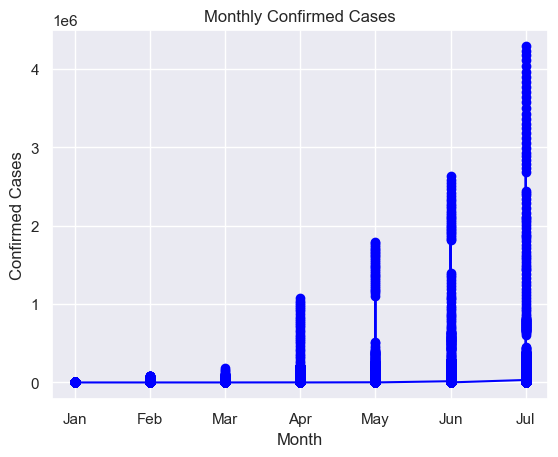

In [29]:
plt.plot(df["Month-str"],df["Confirmed"], color="blue", marker="o")
plt.title("Monthly Confirmed Cases")
plt.xlabel("Month")
plt.ylabel("Confirmed Cases")
plt.show()

Text(0.5, 1.0, 'Worldwide Monthly Active Cases')

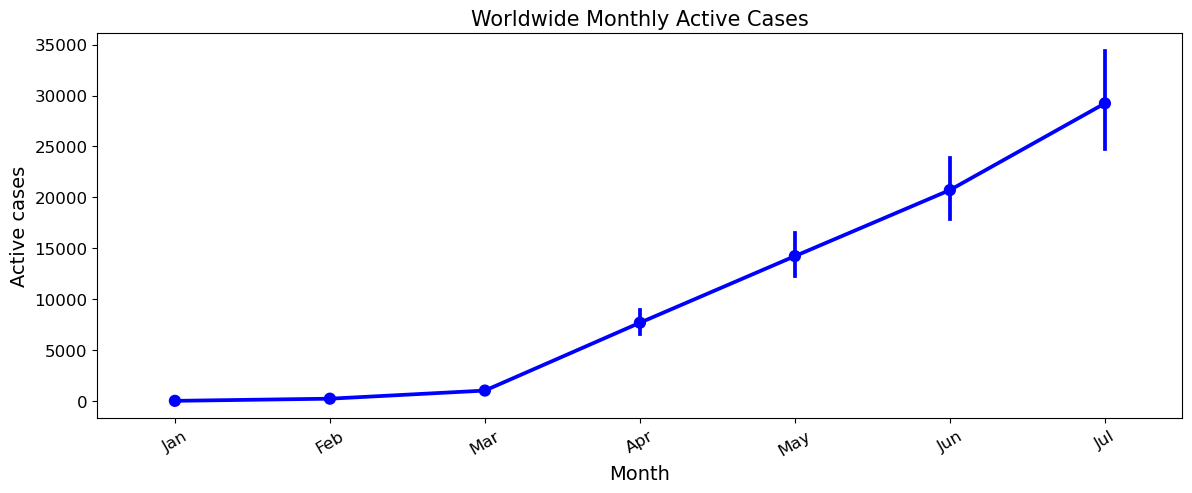

In [37]:
plt.figure(figsize= (14,5))

ax = sns.pointplot(x=df["Month-str"],
                   y=df["Active"],
                   color='b')
ax.set(xlabel="Month-str", ylabel='Active')

plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Month', fontsize=14)
plt.ylabel('Active cases', fontsize=14)
plt.title('Worldwide Monthly Active Cases', fontsize=15)

<Axes: xlabel='MonthStr'>

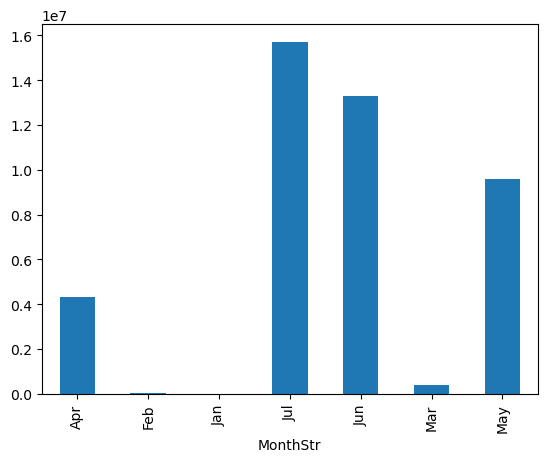

In [19]:
df.groupby('MonthStr')['Deaths'].sum().plot(kind='bar')

## Top 10 Countries highest Cases

In [34]:
top_death = top.groupby('Country/Region')['Deaths'].sum().sort_values(ascending =False).head(10).reset_index()
top_death

Country/Region  Deaths
0              US  148011
1          Brazil   87618
2  United Kingdom   45844
3          Mexico   44022
4           Italy   35112
5           India   33408
6          France   30212
7           Spain   28432
8            Peru   18418
9            Iran   15912

In [39]:
# Highest death per contry and date
top = df.loc[df['Date'] == df['Date'].max()]

In [40]:
# Top casualty
top_casualities = top.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending =False).head(10).reset_index()
top_casualities

Country/Region  Confirmed
0              US    4290259
1          Brazil    2442375
2           India    1480073
3          Russia     816680
4    South Africa     452529
5          Mexico     395489
6            Peru     389717
7           Chile     347923
8  United Kingdom     301708
9            Iran     293606

Text(0.5, 1.0, 'Top 10 countries having most confirmed cases')

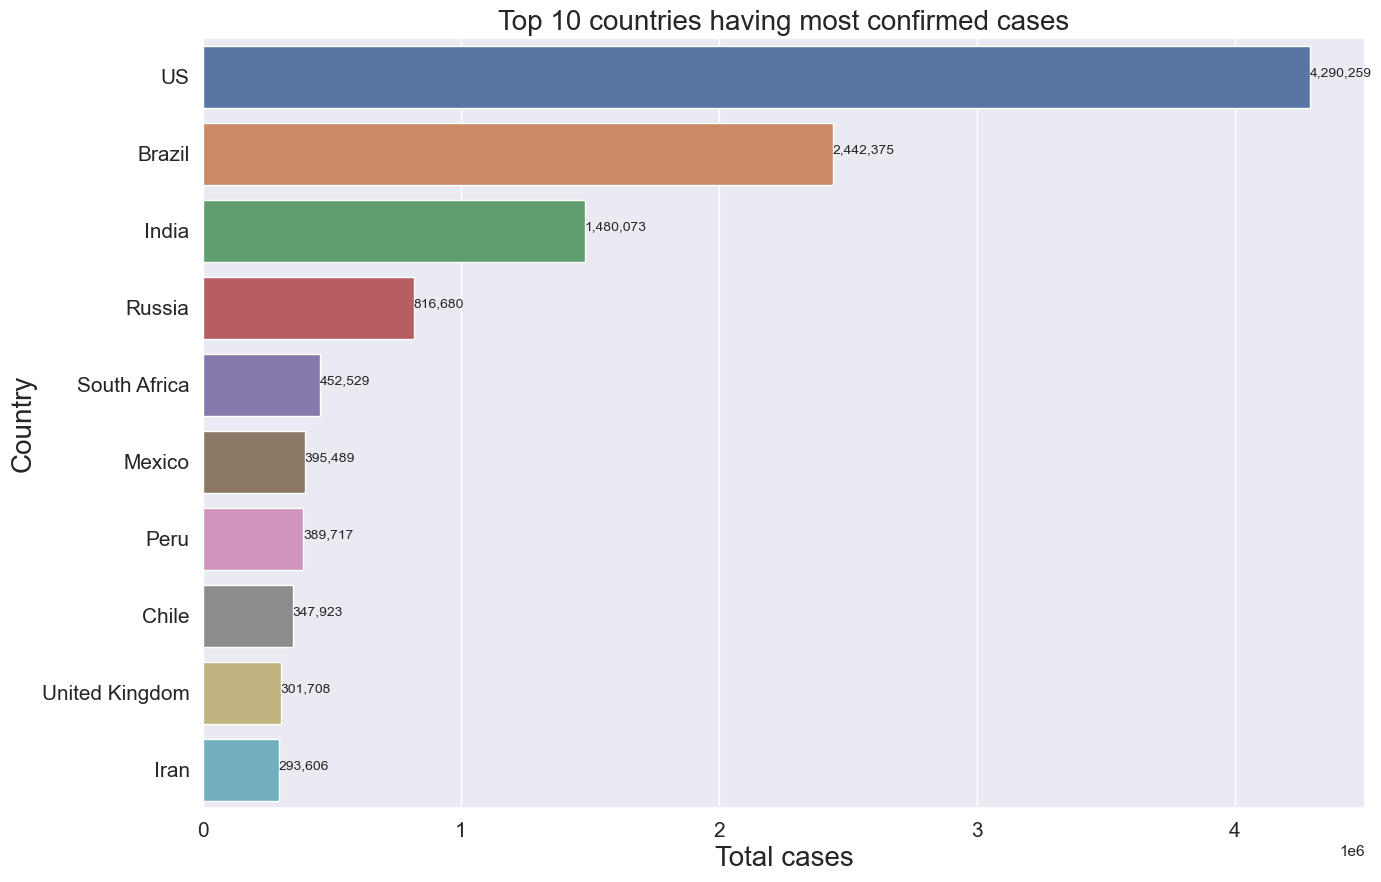

In [41]:
sns.set(style="darkgrid")
plt.figure(figsize= (15,10))

ax = sns.barplot(x=top_casualities['Confirmed'],
                 y=top_casualities['Country/Region'])

for i, (value, name) in enumerate(zip(top_casualities['Confirmed'], top_casualities['Country/Region'])):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total cases', ylabel='Country/Region')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases', fontsize=20)
plt.ylabel('Country', fontsize=20)
plt.title('Top 10 countries having most confirmed cases', fontsize=20)

<Axes: title={'center': 'Countries with Most Deaths'}, xlabel='Country/Region', ylabel='Deaths'>

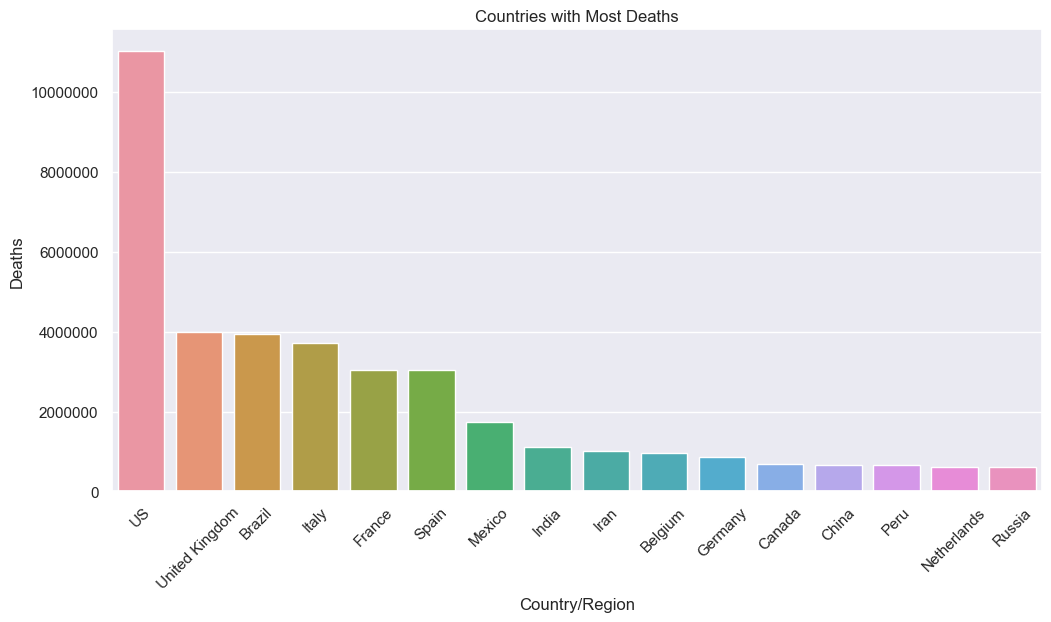

In [42]:
plt.figure(figsize=(12,6))
countries_most_deaths = df.groupby(['Country/Region'])[['Deaths']].sum().reset_index().sort_values(by='Deaths', ascending=False).head(16).reset_index(drop=True)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.title('Countries with Most Deaths')
sns.barplot(data=countries_most_deaths, x='Country/Region', y='Deaths')

<Axes: title={'center': 'Countries with Most Active'}, xlabel='Country/Region', ylabel='Active'>

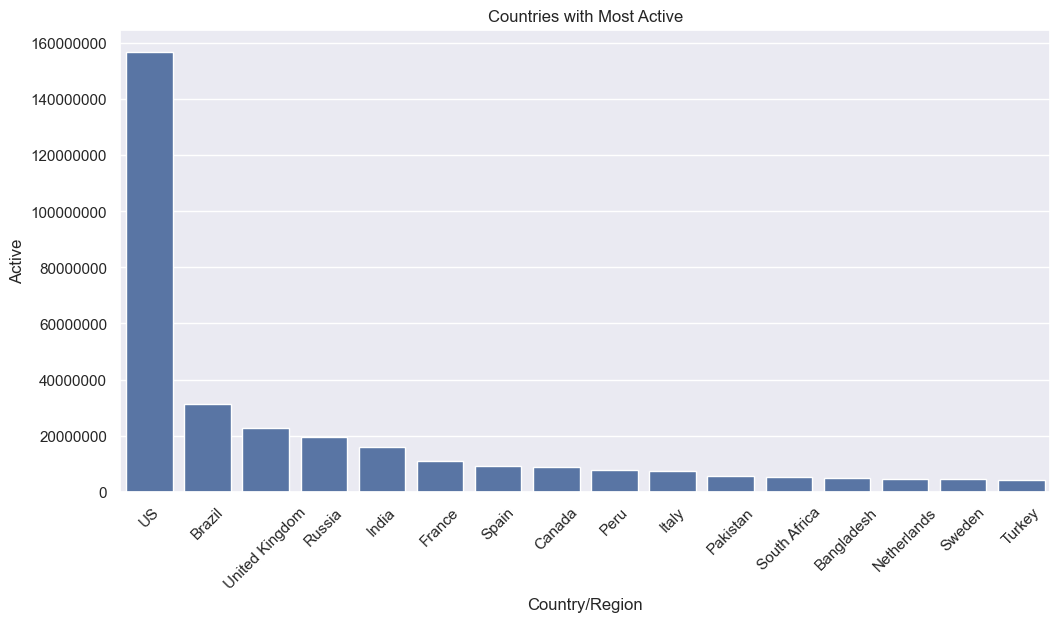

In [39]:
plt.figure(figsize=(12,6))
countries_most_active = df.groupby(['Country/Region'])[['Active']].sum().reset_index().sort_values(by='Active', ascending=False).head(16).reset_index(drop=True)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.title('Countries with Most Active')
sns.barplot(data=countries_most_active, x='Country/Region', y='Active')

<Axes: title={'center': 'Countries with Most Recovered'}, xlabel='Country/Region', ylabel='Recovered'>

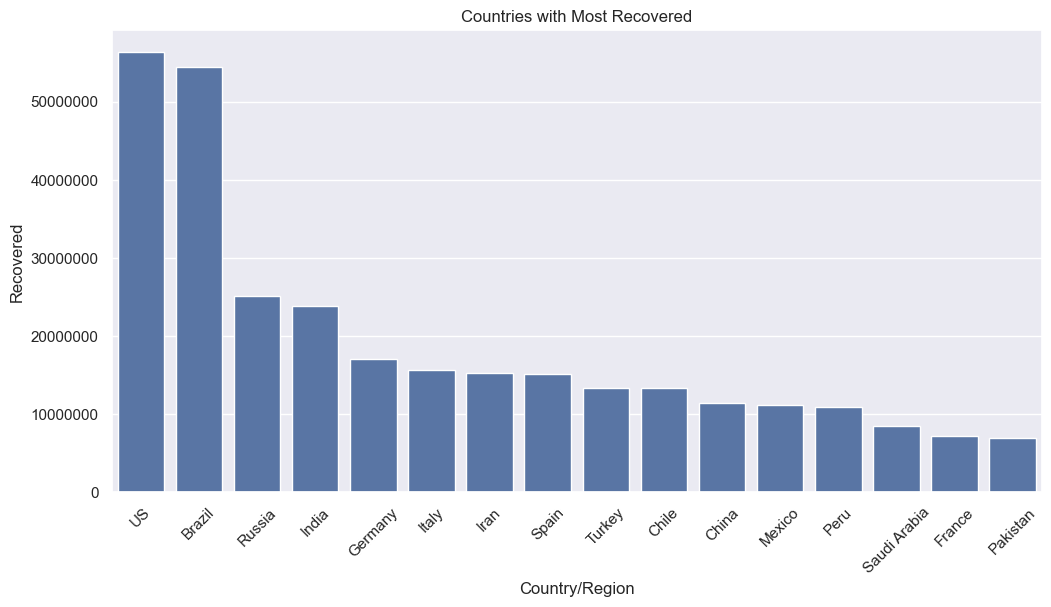

In [52]:
plt.figure(figsize=(12,6))
countries_most_active = df.groupby(['Country/Region'])[['Recovered']].sum().reset_index().sort_values(by='Recovered', ascending=False).head(16).reset_index(drop=True)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.title('Countries with Most Recovered')
sns.barplot(data=countries_most_active, x='Country/Region', y='Recovered')

# Observation
- The United States, Brazil, and India show the highest daily case growth, while countries like Mexico and the United Kingdom exhibit high mortality rates relative to their case counts. 

- The cumulative deaths chart highlights the U.S. as the most severely impacted, followed by Brazil, India, and Mexico. 


## Mortality Ratio

In [6]:
# Death Ratio per number of confirm cases
df['Death_Ratio'] = df['Deaths'] / df['Confirmed']

In [7]:
df

Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
0     2020-01-22         Afghanistan          0       0          0       0   
1     2020-01-22             Albania          0       0          0       0   
2     2020-01-22             Algeria          0       0          0       0   
3     2020-01-22             Andorra          0       0          0       0   
4     2020-01-22              Angola          0       0          0       0   
...          ...                 ...        ...     ...        ...     ...   
35151 2020-07-27  West Bank and Gaza      10621      78       3752    6791   
35152 2020-07-27      Western Sahara         10       1          8       1   
35153 2020-07-27               Yemen       1691     483        833     375   
35154 2020-07-27              Zambia       4552     140       2815    1597   
35155 2020-07-27            Zimbabwe       2704      36        542    2126   

       New cases  New deaths  New recovered             WHO Region  Month  \
0              0           0              0  Eastern Mediterranean      1   
1              0           0              0                 Europe      1   
2              0           0              0                 Africa      1   
3              0           0              0                 Europe      1   
4              0           0              0                 Africa      1   
...          ...         ...            ...                    ...    ...   
35151        152           2              0  Eastern Mediterranean      7   
35152          0           0              0                 Africa      7   
35153         10           4             36  Eastern Mediterranean      7   
35154         71           1            465                 Africa      7   
35155        192           2             24                 Africa      7   

      Month-str  Death_Ratio  
0           Jan          NaN  
1           Jan          NaN  
2           Jan          NaN  
3           Jan          NaN  
4           Jan          NaN  
...         ...          ...  
35151       Jul     0.007344  
35152       Jul     0.100000  
35153       Jul     0.285630  
35154       Jul     0.030756  
35155       Jul     0.013314  

[35156 rows x 13 columns]

<Axes: title={'center': 'Countries with highest Mortality Ratio'}, xlabel='Country/Region', ylabel='Death_Ratio'>

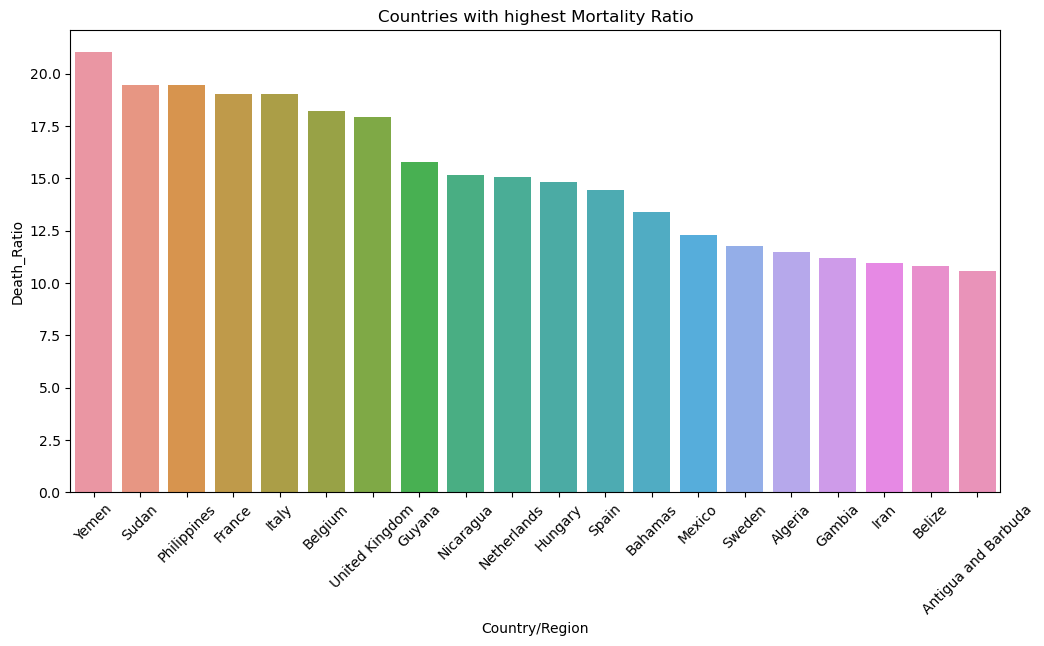

In [36]:
plt.figure(figsize=(12,6))
countries_most_active = df.groupby(['Country/Region'])[['Death_Ratio']].sum().reset_index().sort_values(by='Death_Ratio', ascending=False).head(20).reset_index(drop=True)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.title('Countries with highest Mortality Ratio')
sns.barplot(data=countries_most_active, x='Country/Region', y='Death_Ratio')

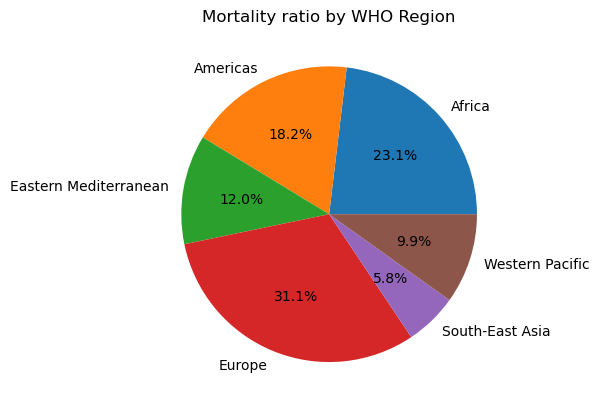

In [19]:
pp=df.groupby('WHO Region')['Death_Ratio'].count()
plt.pie(pp,labels=pp.index,autopct='%1.1f%%')
plt.title('Mortality ratio by WHO Region')
plt.show()

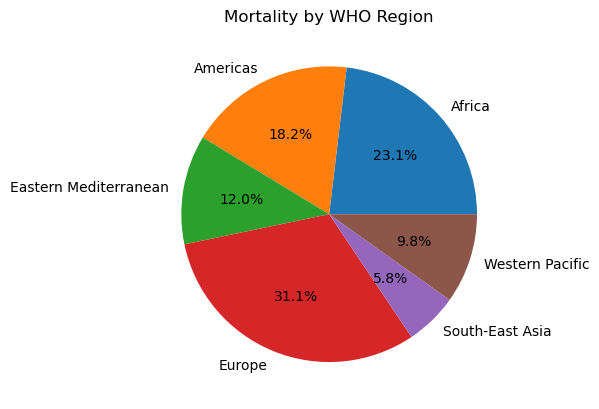

In [25]:
pp=df.groupby('WHO Region')['Deaths'].count()
plt.pie(pp,labels=pp.index,autopct='%1.1f%%')
plt.title('Mortality by WHO Region')
plt.show()

# Observation: 
#####  6 WHO Region have Mortality Ratio and Mortality Rate in decreasing order Europe have the highest percent followed by Africa, America, Eastern Mediterranean, Western Pacific while South-East Asia have the lowest percent.

In [8]:
df['Year']=df['Date'].dt.year
df['MonthStr']=df['Date'].dt.strftime("%b")

In [12]:
import plotly.express as px

global_data = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

fig = px.scatter_geo(global_data, locations="Country/Region", locationmode='country names', 
                     size="Confirmed", color="Deaths", hover_name="Country/Region",
                     title='Global Distribution of COVID-19 Cases',
                     projection="natural earth")
fig.show()

# Observation
"""taking a deeper look of france data, from the observation, US, Brazil have her confirm case, death rate and recovery, but lower Death Ratio, Only France is the observe country with high confirm cases, death rate, death ratio and lower recovery rate""" 

###  Analysis of France Data

In [ ]:
france_data = df.loc[df['Country/Region'] == 'France', ['Date', 'Recovered', 'Deaths', 'Confirmed', 'Active', 'Death_Ratio']]
france_data.head()

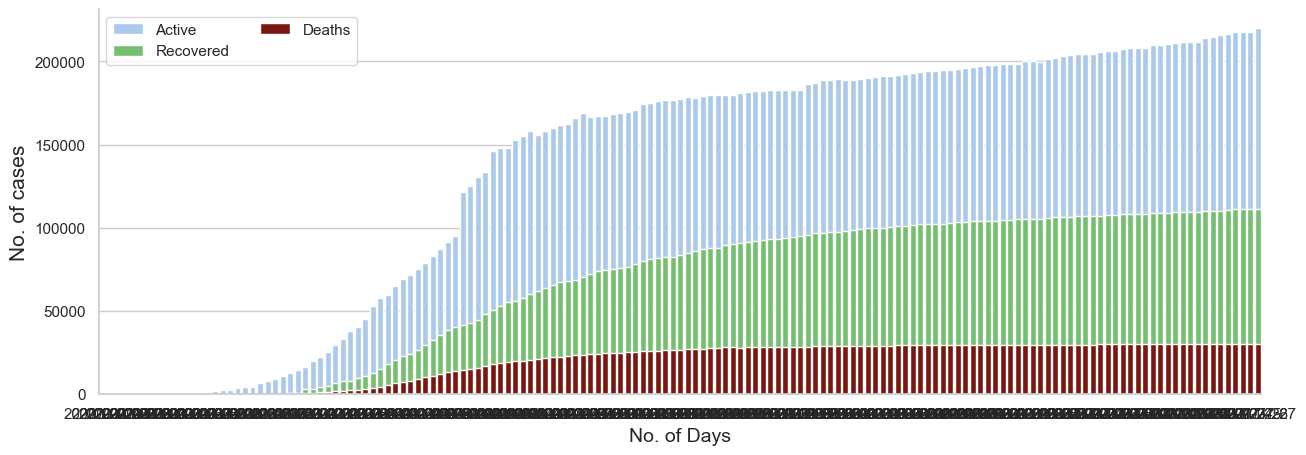

In [77]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 5))

# Plot the total cases
sns.set_color_codes("pastel")
sns.barplot(x=france_data.Date, y=france_data.Active + france_data.Recovered + france_data.Deaths,
            label="Active", color="b")

# Plot the recovered
sns.set_color_codes("muted")
sns.barplot(x=france_data.Date, y=france_data.Recovered + france_data.Deaths, 
            label="Recovered", color="g")

# Plot the Deaths
sns.set_color_codes("dark")
sns.barplot(x=france_data.Date ,y=france_data.Deaths, 
            label="Deaths", color="r")

plt.xlabel('No. of Days', fontsize=14)
plt.ylabel('No. of cases', fontsize=15)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True)
sns.despine(top=True)


In [74]:
france_data = france_data.groupby('Date').sum().reset_index()
france_data = france_data.iloc[33:]
france_data.head()

Date  Recovered  Deaths  Confirmed  Active  Death_Ratio
33 2020-02-24          4       1         12       7     0.083333
34 2020-02-25         11       1         14       2     0.071429
35 2020-02-26         11       2         18       5     0.111111
36 2020-02-27         11       2         38      25     0.052632
37 2020-02-28         11       2         57      44     0.035088

Text(0.5, 1.0, 'France Active Cases Over Time')

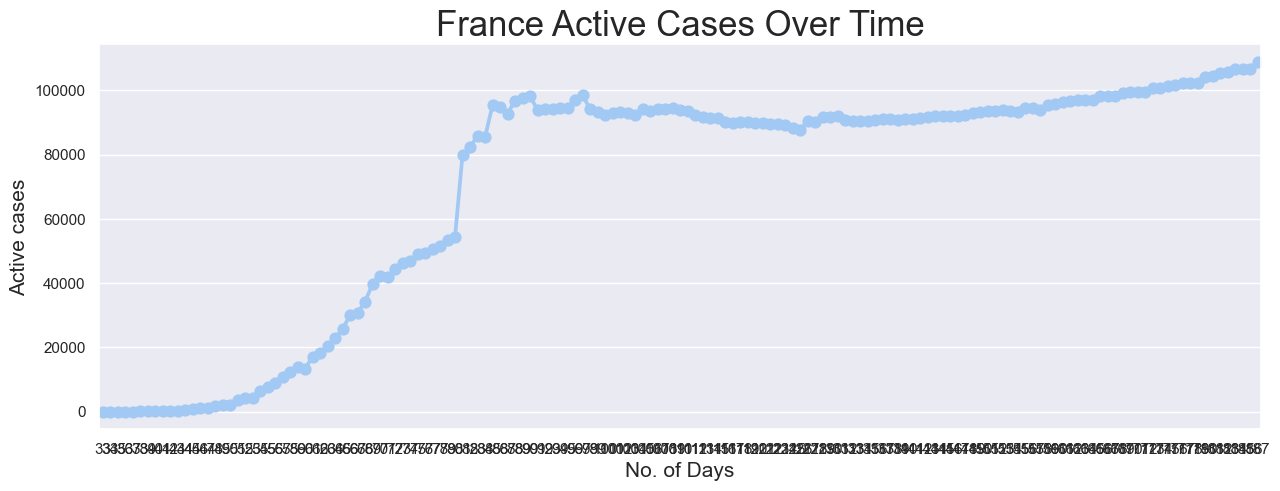

In [75]:
plt.figure(figsize=(15,5))
sns.set_color_codes("pastel")


sns.pointplot(x=france_data.index, y=france_data['Active'], color='b')

plt.xlabel('No. of Days', fontsize=15)
plt.ylabel('Active cases', fontsize=15)
plt.title("France Active Cases Over Time", fontsize=25)

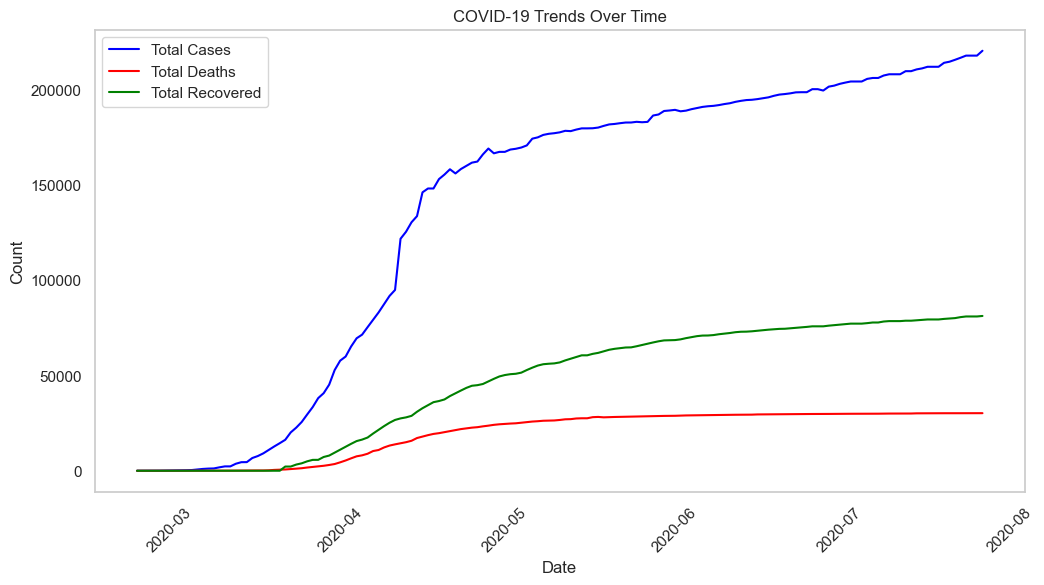

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(france_data['Date'], france_data['Confirmed'], label='Total Cases', color='blue')
plt.plot(france_data['Date'], france_data['Deaths'], label='Total Deaths', color='red')
plt.plot(france_data['Date'], france_data['Recovered'], label='Total Recovered', color='green')
plt.title('COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

###  Analysis of Brazil Data

In [82]:
brazil_data = df.loc[df['Country/Region'] == 'Brazil', ['Date', 'Recovered', 'Deaths', 'Confirmed', 'Active', 'Death_Ratio']]
brazil_data.head()

Date  Recovered  Deaths  Confirmed  Active  Death_Ratio
23  2020-01-22          0       0          0       0          NaN
210 2020-01-23          0       0          0       0          NaN
397 2020-01-24          0       0          0       0          NaN
584 2020-01-25          0       0          0       0          NaN
771 2020-01-26          0       0          0       0          NaN

In [83]:
brazil_data = brazil_data.groupby('Date').sum().reset_index()
brazil_data = brazil_data.iloc[33:]
brazil_data.head()

Date  Recovered  Deaths  Confirmed  Active  Death_Ratio
33 2020-02-24          0       0          0       0          0.0
34 2020-02-25          0       0          0       0          0.0
35 2020-02-26          0       0          1       1          0.0
36 2020-02-27          0       0          1       1          0.0
37 2020-02-28          0       0          1       1          0.0

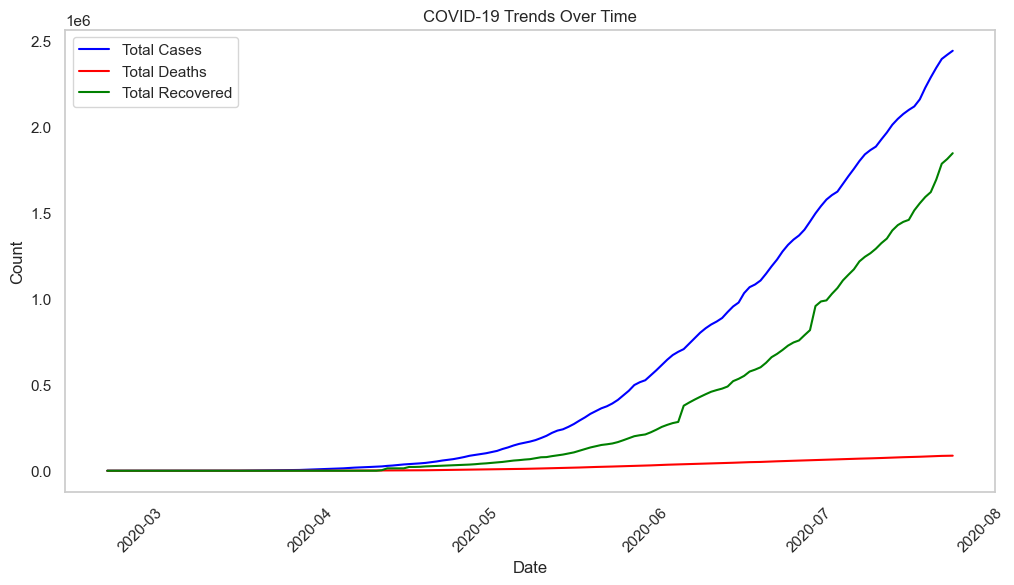

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(brazil_data['Date'], brazil_data['Confirmed'], label='Total Cases', color='blue')
plt.plot(brazil_data['Date'], brazil_data['Deaths'], label='Total Deaths', color='red')
plt.plot(brazil_data['Date'], brazil_data['Recovered'], label='Total Recovered', color='green')
plt.title('COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

###  Analysis of US Data

In [86]:
us_data = df.loc[df['Country/Region'] == 'US', ['Date', 'Recovered', 'Deaths', 'Confirmed', 'Active', 'Death_Ratio']]
us_data.head()

Date  Recovered  Deaths  Confirmed  Active  Death_Ratio
173 2020-01-22          0       0          1       1          0.0
360 2020-01-23          0       0          1       1          0.0
547 2020-01-24          0       0          2       2          0.0
734 2020-01-25          0       0          2       2          0.0
921 2020-01-26          0       0          5       5          0.0

In [87]:
us_data = us_data.groupby('Date').sum().reset_index()
us_data = us_data.iloc[33:]
us_data.head()

Date  Recovered  Deaths  Confirmed  Active  Death_Ratio
33 2020-02-24          5       0         15      10          0.0
34 2020-02-25          6       0         15       9          0.0
35 2020-02-26          6       0         15       9          0.0
36 2020-02-27          6       0         16      10          0.0
37 2020-02-28          7       0         16       9          0.0

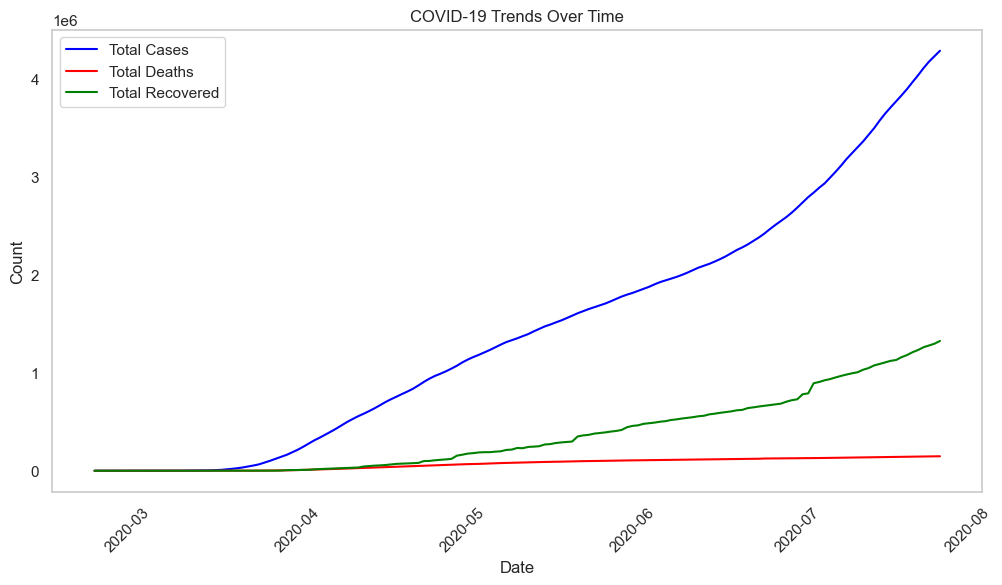

In [88]:
plt.figure(figsize=(12, 6))
plt.plot(us_data['Date'], us_data['Confirmed'], label='Total Cases', color='blue')
plt.plot(us_data['Date'], us_data['Deaths'], label='Total Deaths', color='red')
plt.plot(us_data['Date'], us_data['Recovered'], label='Total Recovered', color='green')
plt.title('COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Modelling
Model Deployment is the Creation of a framework for predictions or visualizations.

> ### Looking at the following
- Hypyterparameter
- Predicting Actual Data and predicted Data
- Feature importance
- Mean Absolute Error
- Mean Squared Error
- R2_Score

### Feature Engineering:
- Create lag features for temporal predictions (e.g., previous day cases).
- Extract relevant features (trends, cumulative totals, region).
- Normalize or standardize features if necessary.

### Model Selection / Hypyterparameter :
- Time-series models (e.g., ARIMA, LSTM) for temporal predictions.
- Regression models for predicting specific outcomes.
A Random Forest Regressor is used as a baseline model.

### Choose the Target Variable
For this dataset, I predict:
- Confirmed cases (for forecasting the pandemic's spread).
- Deaths (for understanding severity and mortality rates).

### Model Training and Evaluation:
- Train-test split or cross-validation.
The dataset is split into training (80%) and testing (20%) sets.

### Select Evaluation Metrics to assess the model's suitability.
Regression Tasks (predicting numerical values like cases or deaths)
- Mean Absolute Error (MAE): Average magnitude of prediction errors.
- Root Mean Square Error (RMSE): Penalizes large errors more than MAE.
- R² Score: How well the model explains the variability of the data

Compare metrics across different models to find the most suitable one.

Visualize predictions vs. actual values to understand trends.

### Feature Importance:
- Shows which lagged features contribute the most to the predictions.


In [ ]:
### Parsing dates
when we work with time series data, we want to enrich the time & date component as much as possible.

we can do that by telling pandas which of our columns has dates in it using the 'parse_date' parameter. 

### Hypyterparameter

Mean Absolute Error (MAE): 34061.93357085303
Mean Squared Error (MSE): 19035982182.561096
R2_score (r2_score): 0.015155955831920864


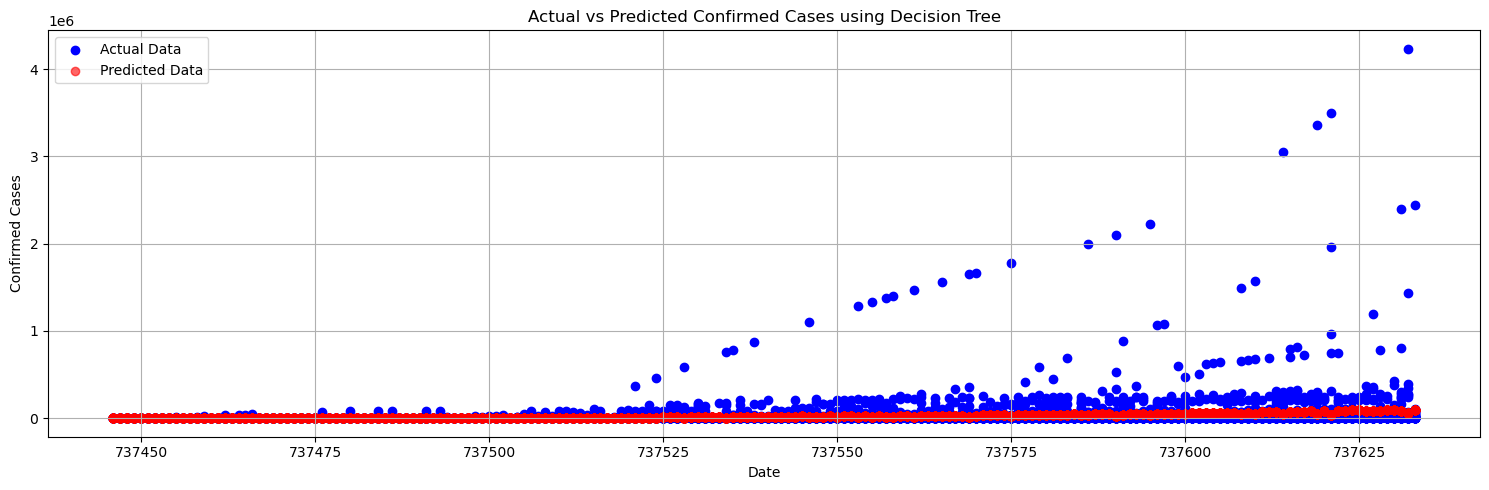

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ensure 'Date' column is properly converted to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)  # Convert date to numeric

# Define features (X) and target (y)
X = df['Date_ordinal'].values.reshape(-1, 1)  # Feature: Date as numeric
y = df['Confirmed']  # Target: Confirmed cases

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2_score (r2_score): {r2_score}")

# Plot predictions vs actual data
plt.figure(figsize=(15, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Confirmed Cases using Decision Tree')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Insight
1. The **R-squared (R²)** value of 0.015 indicates that the model explains only 1.5% of the variance in the target variable, signifying an extremely poor fit.  
2. The high **MAE** (34,061.93) and **MSE** (19,035,982,182.56) reveal significant prediction errors, with the model consistently deviating substantially from actual values.  
3. The results suggest that the model is likely ineffective and unable to capture the underlying patterns or relationships in the data.  
4. Possible causes for the poor performance could include insufficient feature representation, inappropriate model selection, or noisy data.  
5. To improve, it is necessary to revisit feature engineering, adjust the model, or explore alternative algorithms better suited to the dataset.  

Experiment with hyperparameters (e.g., tree depth, number of estimators).
Use alternative models (e.g., Gradient Boosting or LSTM for time-series data).

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime
df.sort_values(by='Date', inplace=True)   # Ensure data is sorted by date

# Feature engineering: Add lag features for time-series prediction
df['PreviousDay'] = df['Deaths'].shift(1)  # Previous day's cases
df['TwoDays'] = df['Deaths'].shift(2)  # Two days ago
df['ThreeDays'] = df['Deaths'].shift(3)  # Three days ago

# Drop rows with NaN values caused by lagging
df.dropna(inplace=True)

# Step 2: Define Features (X) and Target (y
features = ['PreviousDay', 'TwoDays', 'ThreeDays']
X = df[features]
y = df['Deaths']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print Metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Optional: Feature ImportanceA
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Mean Absolute Error (MAE): 817.513641181407
Root Mean Square Error (RMSE): 3282.8531287195456
R-squared (R²): 0.8480064361636497

Feature Importance:
       Feature  Importance
2    ThreeDays    0.504876
0  PreviousDay    0.315745
1      TwoDays    0.179379


# Insight 
1. The **R-squared (R²)** value of 0.848 indicates that the model explains 84.8% of the variance in the target variable, suggesting a good fit.  
2. However, the **MAE** (817.51) and **RMSE** (3282.85) reveal that while the model performs well overall, individual prediction errors can still be significant, with RMSE indicating more sensitivity to larger errors.  
3. The feature importance analysis highlights that the "ThreeDays" variable has the highest predictive power (50.49%), followed by "PreviousDay" (31.57%) and "TwoDays" (17.94%).  
4. The dominance of the "ThreeDays" feature suggests that recent data from three days ago has the most influence on predicting the target variable.  
5. Overall, the model is reliable for predictive purposes, but the relatively high error metrics may indicate room for improvement in fine-tuning or feature engineering.

Mean Absolute Error (MAE): 47458.73926690582
Root Mean Square Error (RMSE): 182108.1147369225
R-squared (R²): 0.012332078582827366

Feature Importance:
         Feature  Importance
2  DateDayOfYear     0.84638
1        DateDay     0.08561
0  DateDayOfWeek     0.06801


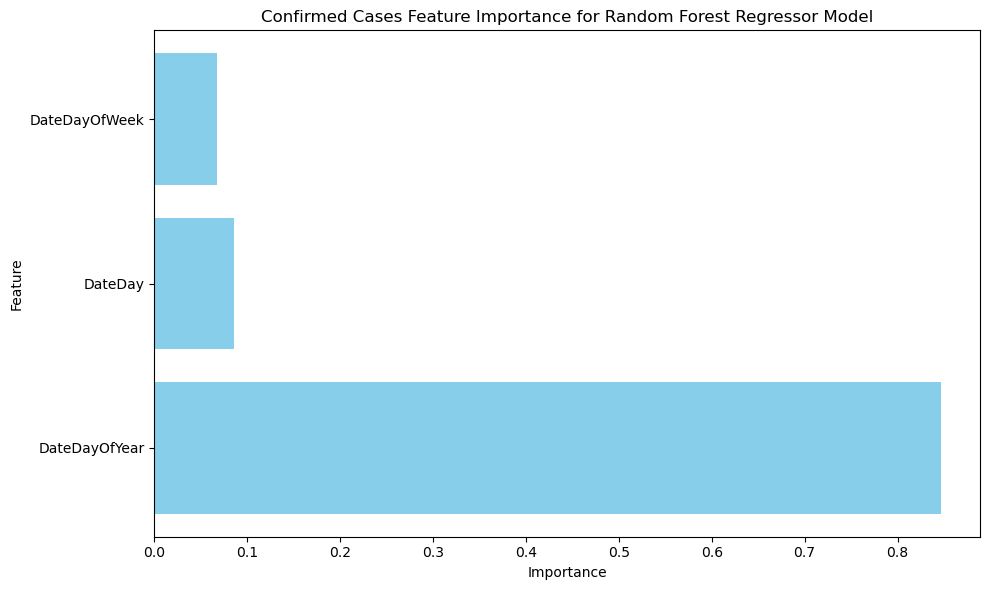

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime
df.sort_values(by='Date', inplace=True)   # Ensure data is sorted by date

# Feature engineering: Add lag features for time-series prediction
df['DateDay'] = df.Date.dt.day
df['DateDayOfWeek'] = df.Date.dt.dayofweek
df['DateDayOfYear'] = df.Date.dt.dayofyear # Previous day's cases
 # Two days ago
 # Three days ago

# Drop rows with NaN values caused by lagging
df.dropna(inplace=True)

# Step 2: Define Features (X) and Target (y)
features = ['DateDayOfWeek', 'DateDay', 'DateDayOfYear']
X = df[features]
y = df['Confirmed']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print Metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Optional: Feature ImportanceA
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Confirmed Cases Feature Importance for Random Forest Regressor Model')
plt.tight_layout()
plt.show()


# Insight
The model’s performance seems suboptimal based on the low R² and high RMSE, indicating that it is not capturing much of the underlying patterns in the data. The model also heavily relies on the DateDayOfYear feature, while the other features (DateDay and DateDayOfWeek) play much smaller roles.

### Installation of lightgbm for gradient boosting model (LightGBM) for improved prediction performance.

In [10]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/d9/28/3be76b591a2e14a031b681b8283acf1dec2ad521f6f1701b7957df68c466/lightgbm-4.5.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 1.4 MB/s eta 0:00:02
    --------------------------------------- 0.0/1.4 MB 1.4 MB/s eta 0:00:02
    --------------------------------------- 0.0/1.4 MB 1.4 MB/s eta 0:00:02
    --------------------------------------- 0.0/1.4 MB 1.4 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.4 MB 375.8 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.4 MB 375.8 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.4 MB 375.8 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.4 MB 375.8 kB/s eta 0:00:04
   -- ------------------------

In [1]:
import lightgbm as lgb

# Print the version to confirm successful installation
print(f"LightGBM version: {lgb.__version__}")


LightGBM version: 4.5.0


In [19]:
pip show lightgbm

Name: lightgbm
Version: 4.5.0
Summary: LightGBM Python Package
Home-page: https://github.com/microsoft/LightGBM
Author: 
Author-email: 
License: The MIT License (MIT)

Copyright (c) Microsoft Corporation

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS O

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 21700, number of used features: 5
[LightGBM] [Info] Start training from score 30823.576267
Mean Absolute Error (MAE): 3125.726850279785
Root Mean Square Error (RMSE): 12774.675606898842
R-squared (R²): 0.991854845208874

Feature Importance:
       Feature  Importance
4   GrowthRate         862
3  SevenDayAvg         703
0  PreviousDay         685
2    ThreeDays         415
1      TwoDays         335


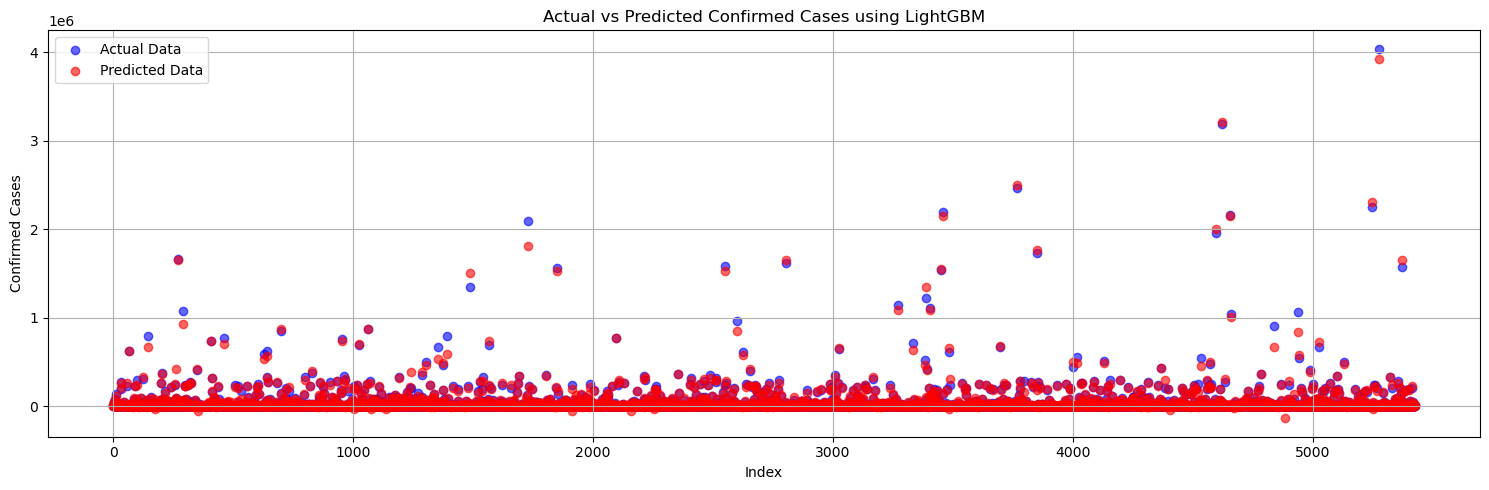

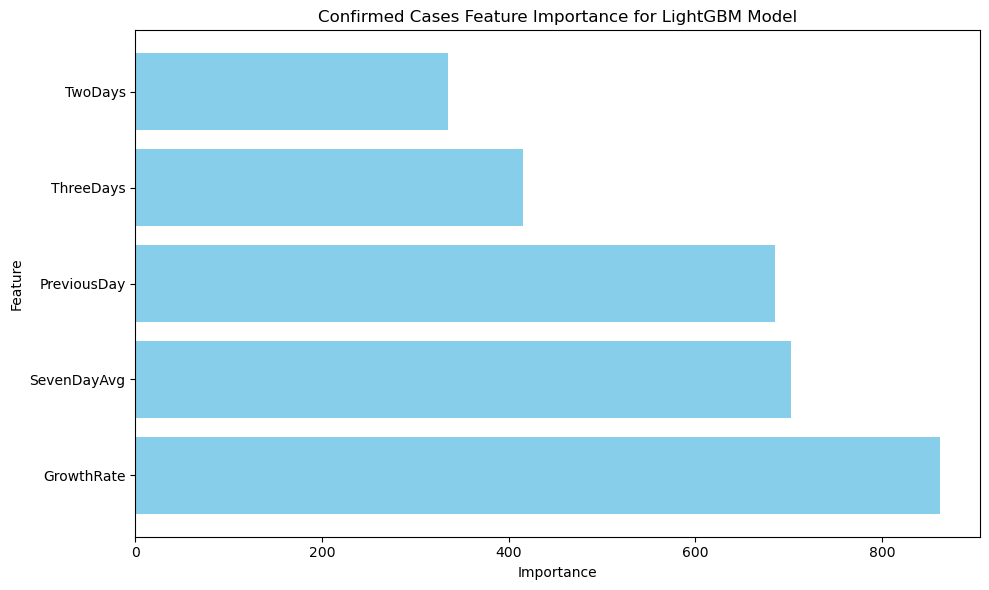

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt

# Feature Engineering: Adding Lag Features and Growth Rates
def add_features(df):
    df['PreviousDay'] = df['Confirmed'].shift(1)
    df['TwoDays'] = df['Confirmed'].shift(2)
    df['ThreeDays'] = df['Confirmed'].shift(3)
    df['SevenDayAvg'] = df['Confirmed'].rolling(window=7, min_periods=1).mean()
    df['GrowthRate'] = df['Confirmed'].pct_change().fillna(0)  # Growth rate as percentage change
    return df

# Apply feature engineering
df = add_features(df)

# Drop rows with NaN caused by lagging
df.dropna(inplace=True)

# Define Features (X) and Target (y)
features = ['PreviousDay', 'TwoDays', 'ThreeDays', 'SevenDayAvg', 'GrowthRate']
X = df[features]
y = df['Confirmed']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train Gradient Boosting Model (LightGBM)
model = lgb.LGBMRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print Metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot Predictions vs Actual Data
plt.figure(figsize=(15, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Data', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Data', alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Confirmed Cases using LightGBM')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Confirmed Cases Feature Importance for LightGBM Model')
plt.tight_layout()
plt.show()

# Insight
- The **R-squared (R²)** value of 0.992 indicates that the LightGBM model explains 99.2% of the variance in the target variable, showcasing an excellent fit.  
- Despite the strong fit, the **MAE** (3125.73) and **RMSE** (12774.68) suggest significant prediction errors, particularly for larger deviations.  

### Actual vs Predicted Data using LightGBM:  
The scatter plot shows that the predicted values (red points) closely align with the actual values (blue points), demonstrating good model performance across most data points. However, there are visible deviations in some regions, especially with larger values, suggesting potential challenges with extreme cases.  

### Feature Importance for LightGBM:  
The bar chart highlights that "GrowthRate" is the most influential feature, followed by "SevenDayAvg" and "PreviousDay," indicating that recent trends and growth rates are critical for predictions. Meanwhile, "TwoDays" and "ThreeDays" have less importance, showing lower contributions to the model's overall performance.

### While the model performs exceptionally well in explaining variance, the high error metrics suggest potential overfitting or the need for adjustments in handling outliers or extreme values.  

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 21698, number of used features: 5
[LightGBM] [Info] Start training from score 1591.411006
Mean Absolute Error (MAE): 317.0832931374558
Root Mean Square Error (RMSE): 1122.7416572205577
R-squared (R²): 0.9806942876994849

Feature Importance:
       Feature  Importance
4   GrowthRate         748
0  PreviousDay         593
3  SevenDayAvg         587
1      TwoDays         557
2    ThreeDays         515


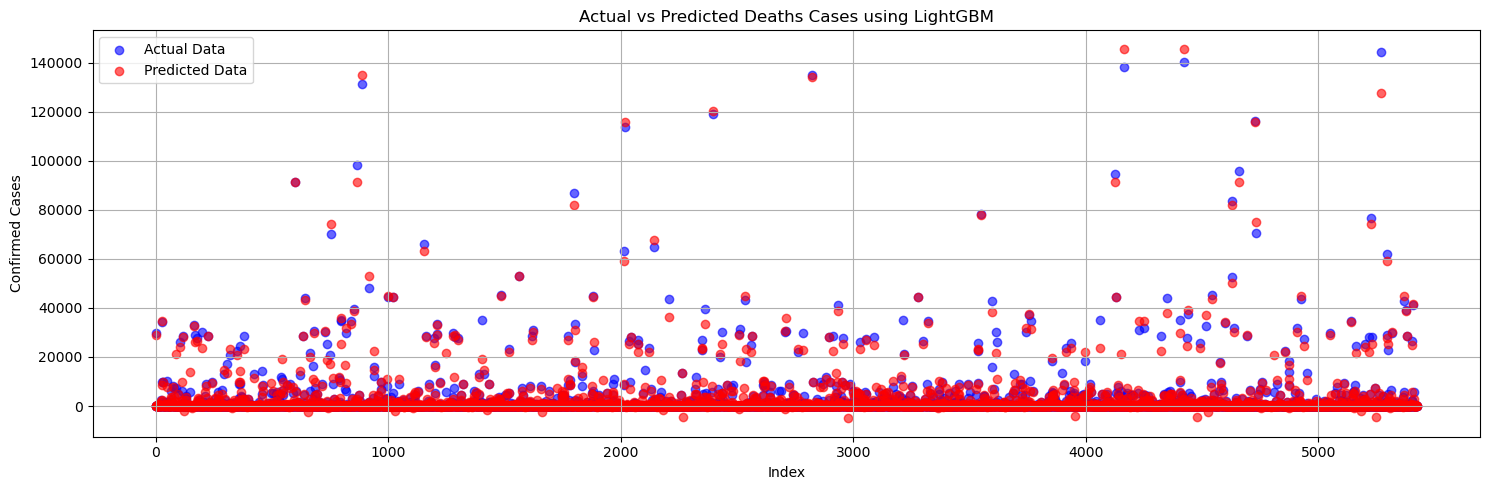

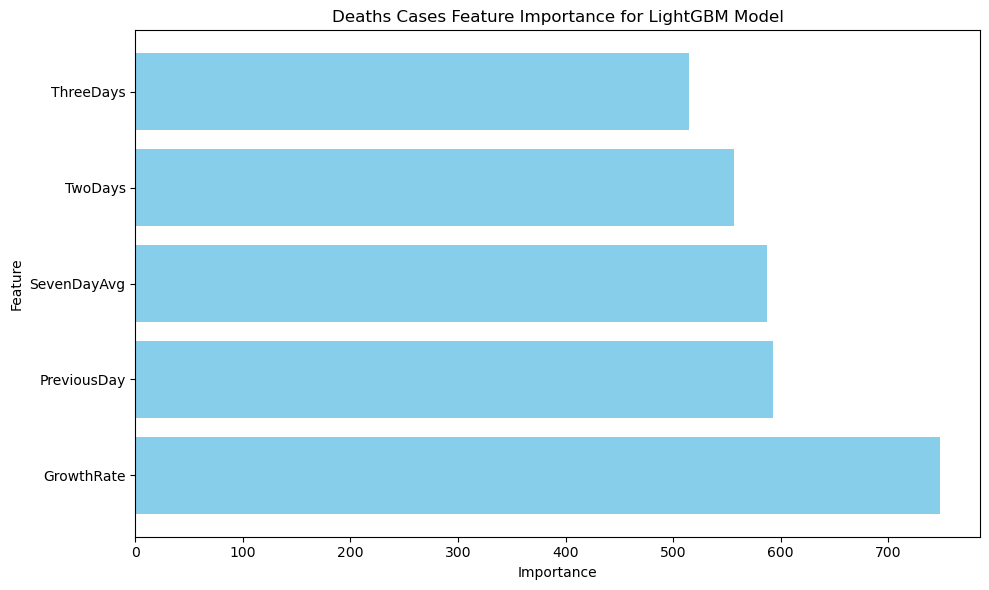

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt

# Feature Engineering: Adding Lag Features and Growth Rates
def add_features(df):
    df['PreviousDay'] = df['Confirmed'].shift(1)
    df['TwoDays'] = df['Confirmed'].shift(2)
    df['ThreeDays'] = df['Confirmed'].shift(3)
    df['SevenDayAvg'] = df['Confirmed'].rolling(window=7, min_periods=1).mean()
    df['GrowthRate'] = df['Confirmed'].pct_change().fillna(0)  # Growth rate as percentage change
    return df

# Apply feature engineering
df = add_features(df)

# Drop rows with NaN caused by lagging
df.dropna(inplace=True)

# Define Features (X) and Target (y)
features = ['PreviousDay', 'TwoDays', 'ThreeDays', 'SevenDayAvg', 'GrowthRate']
X = df[features]
y = df['Deaths']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train Gradient Boosting Model (LightGBM)
model = lgb.LGBMRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print Metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot Predictions vs Actual Data
plt.figure(figsize=(15, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Data', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Data', alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Deaths Cases using LightGBM')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Deaths Cases Feature Importance for LightGBM Model')
plt.tight_layout()
plt.show()

# Insight 
- The **R-squared (R²)** value of 0.981 indicates that the model explains 98.1% of the variance in the target variable, showcasing an excellent fit and predictive performance.  
- The **MAE** (317.08) and **RMSE** (1122.74) are significantly lower compared to the previous model, reflecting improved accuracy and smaller prediction errors. 

### Actual vs Predicted Data using LightGBM:  
The scatter plot shows that the predicted values (red points) closely align with the actual values (blue points), demonstrating good model performance across most data points. However, there are visible deviations in some regions, especially with larger values, suggesting potential challenges with extreme cases.  

### Feature Importance for LightGBM:
The **feature importance** analysis highlights "GrowthRate" as the most influential feature (748), followed closely by "PreviousDay" (593) and "SevenDayAvg" (587).  
This suggests that recent trends (e.g., growth rate and averages over seven days) are critical for making accurate predictions, while "ThreeDays" (515) is less impactful compared to other features in this model.  

### Overall, the model is highly reliable, with reduced error metrics and a more balanced feature contribution, indicating a well-optimized setup for the given dataset.

Mean Absolute Error (MAE): 18312.905143496882
Root Mean Square Error (RMSE): 100547.64227824757
R-squared (R²): 0.5052002763515414

Feature Importance:
       Feature  Importance
3  SevenDayAvg    0.365829
2    ThreeDays    0.279082
0  PreviousDay    0.191383
1      TwoDays    0.163706


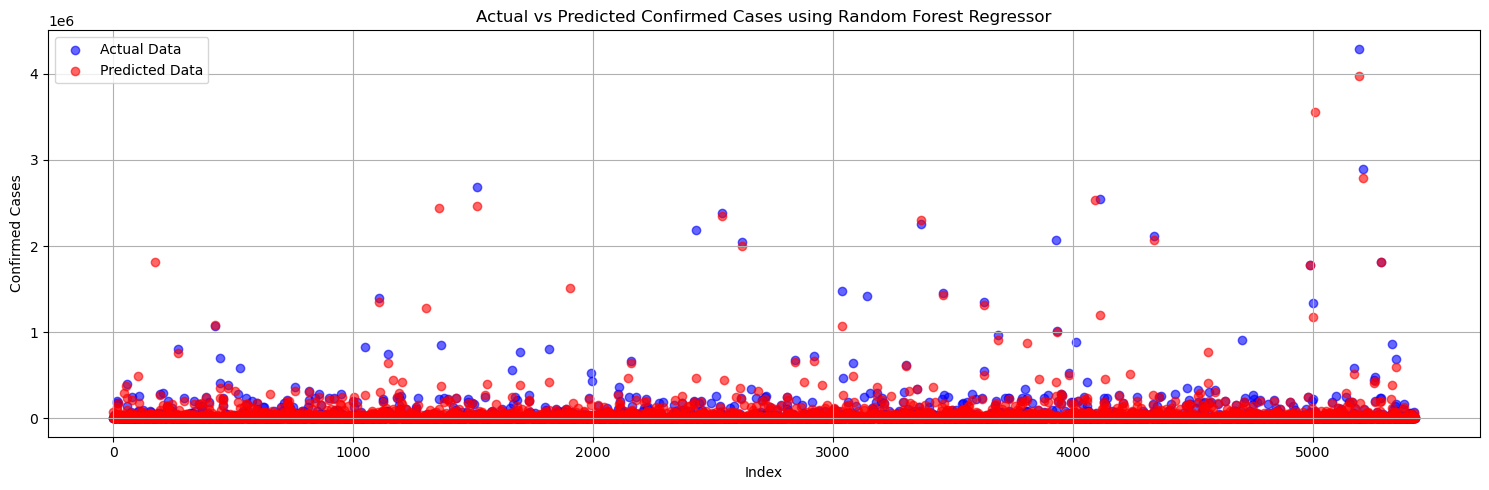

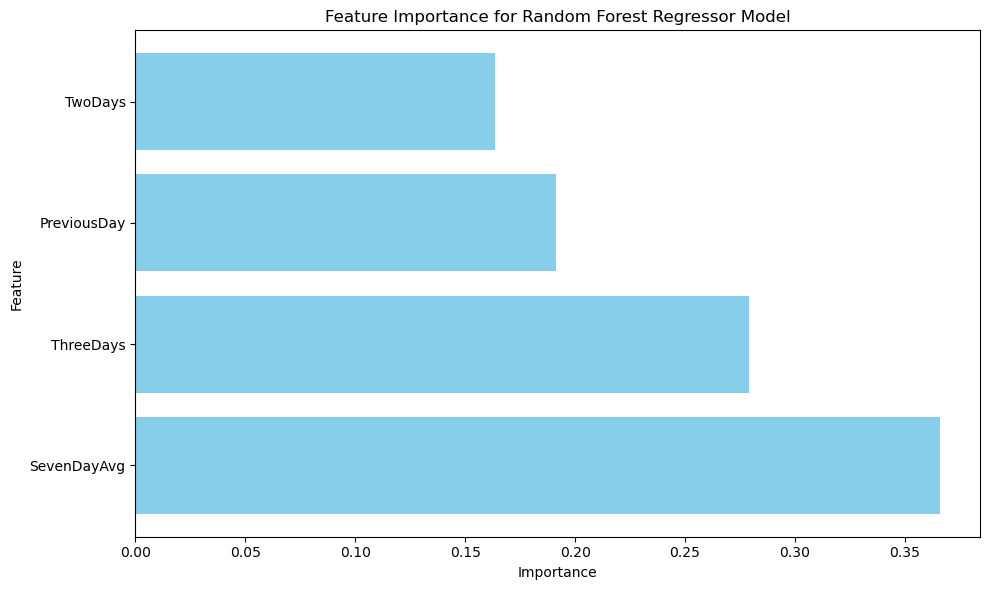

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Feature Engineering: Adding Lag Features and Growth Rates
def add_features(df):
    df['PreviousDay'] = df['Confirmed'].shift(1)
    df['TwoDays'] = df['Confirmed'].shift(2)
    df['ThreeDays'] = df['Confirmed'].shift(3)
    df['SevenDayAvg'] = df['Confirmed'].rolling(window=7, min_periods=1).mean()
    df['GrowthRate'] = df['Confirmed'].pct_change().fillna(0)  # Growth rate as percentage change
    return df

# Apply feature engineering
df = add_features(df)

# Drop rows with NaN caused by lagging
df.dropna(inplace=True)

# Define Features (X) and Target (y)
features = ['PreviousDay', 'TwoDays', 'ThreeDays', 'SevenDayAvg']
X = df[features]
y = df['Confirmed']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train Random Forest Regressor             
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print Metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot Predictions vs Actual Data
plt.figure(figsize=(15, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Data', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Data', alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Confirmed Cases using Random Forest Regressor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Regressor Model')
plt.tight_layout()
plt.show()

Insight
1. The **R-squared (R²)** value of 0.505 indicates that the model explains 50.5% of the variance in the target variable, suggesting moderate predictive power but leaving significant room for improvement.  
2. The **MAE** (18,312.91) and **RMSE** (100,547.64) highlight large prediction errors, indicating that the model struggles to provide accurate forecasts for individual data points.  
3. Among the features, **"SevenDayAvg"** (36.58%) is the most influential, followed by **"ThreeDays"** (27.91%), suggesting that recent trends over a week play the largest role in the predictions.  
4. The lower contributions of **"PreviousDay"** (19.14%) and **"TwoDays"** (16.37%) indicate that short-term data is less impactful compared to longer trends.  
5. To improve the model, additional feature engineering or incorporating other external factors might be necessary to capture more variance and reduce error metrics.

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime
df.sort_values(by='Date', inplace=True)   # Ensure data is sorted by date

# Feature engineering: Add lag features for time-series prediction
df['DateDay'] = df.Date.dt.day
df['DateDayOfWeek'] = df.Date.dt.dayofweek
df['DateDayOfYear'] = df.Date.dt.dayofyear # Previous day's cases
 # Two days ago
 # Three days ago

# Drop rows with NaN values caused by lagging
df.dropna(inplace=True)

# Step 2: Define Features (X) and Target (y)
features = ['DateDayOfWeek', 'DateDay', 'DateDayOfYear']
X = df[features]
y = df['Deaths']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Model
model = lgb.LGBMRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print Metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Optional: Feature ImportanceA
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 21708, number of used features: 3
[LightGBM] [Info] Start training from score 1588.565552
Mean Absolute Error (MAE): 2639.745488188738
Root Mean Square Error (RMSE): 8777.458306313665
R-squared (R²): 0.002393498053866905

Feature Importance:
         Feature  Importance
2  DateDayOfYear        1224
1        DateDay        1022
0  DateDayOfWeek         754


insight
1. The **R-squared (R²)** value of 0.0024 indicates that the model explains virtually none of the variance in the target variable, suggesting that it fails to capture meaningful patterns.  
2. The **MAE** (2639.75) and **RMSE** (8777.46) are extremely high, indicating large prediction errors and poor model performance.  
3. The **feature importance** analysis shows "DateDayOfYear" (1224) as the most significant feature, followed by "DateDay" (1022) and "DateDayOfWeek" (754), suggesting that temporal features contribute most to the model.  
4. The poor performance implies that the selected features are insufficient to explain the target variable and likely lack critical predictive information.  
5. The model requires improvement through better feature selection, engineering, or adding other relevant variables to increase its effectiveness.

Now, let enriched our DataFrame with date time features, to remove Date and all the string dtype column 

In [17]:
df

Date  Country/Region  Confirmed  Deaths  Recovered  Active  \
155   2020-01-22     South Korea          1       0          0       1   
36    2020-01-22           China        548      17         28     503   
87    2020-01-22           Japan          2       0          0       2   
223   2020-01-23           China        643      18         30     595   
342   2020-01-23     South Korea          1       0          0       1   
...          ...             ...        ...     ...        ...     ...   
35063 2020-07-27            Laos         20       0         19       1   
35064 2020-07-27          Latvia       1219      31       1045     143   
35143 2020-07-27          Uganda       1128       2        986     140   
35146 2020-07-27  United Kingdom     301708   45844       1437  254427   
35155 2020-07-27        Zimbabwe       2704      36        542    2126   

       New cases  New deaths  New recovered       WHO Region  ...  MonthStr  \
155            0           0              0  Western Pacific  ...       Jan   
36             0           0              0  Western Pacific  ...       Jan   
87             0           0              0  Western Pacific  ...       Jan   
223           95           1              2  Western Pacific  ...       Jan   
342            0           0              0  Western Pacific  ...       Jan   
...          ...         ...            ...              ...  ...       ...   
35063          0           0              0  Western Pacific  ...       Jul   
35064          0           0              0           Europe  ...       Jul   
35143         13           0              4           Africa  ...       Jul   
35146        688           7              3           Europe  ...       Jul   
35155        192           2             24           Africa  ...       Jul   

      Date_ordinal  PreviousDay  TwoDays  ThreeDays  DateDay  DateDayOfWeek  \
155         737446          1.0      2.0        1.0       22              2   
36          737446          1.0      1.0        2.0       22              2   
87          737446        548.0      1.0        1.0       22              2   
223         737447          2.0    548.0        1.0       23              3   
342         737447        643.0      2.0      548.0       23              3   
...            ...          ...      ...        ...      ...            ...   
35063       737633         10.0  10621.0      431.0       27              0   
35064       737633      33296.0   7235.0     7413.0       27              0   
35143       737633        674.0    462.0  4290259.0       27              0   
35146       737633       1128.0    674.0      462.0       27              0   
35155       737633      59177.0  67096.0       20.0       27              0   

       DateDayOfYear    SevenDayAvg  GrowthRate  
155               22       1.250000    0.000000  
36                22     110.600000  547.000000  
87                22      92.500000   -0.996350  
223               23     171.142857  320.500000  
342               23     171.142857   -0.998445  
...              ...            ...         ...  
35063            209    7068.714286    1.000000  
35064            209   36012.714286   -0.963389  
35143            209  645877.857143    0.673591  
35146            209  688957.857143  266.471631  
35155            209   20008.428571   -0.954307  

[27135 rows x 24 columns]

In [29]:
df.isnull().sum()

Date                 0
Country/Region       0
Confirmed            0
Deaths               0
Recovered            0
Active               0
New cases            0
New deaths           0
New recovered        0
WHO Region           0
Death_Ratio       8018
dtype: int64

Fill the missing value

In [25]:
df['Death_Ratio'] = df['Death_Ratio'].fillna(df['Death_Ratio'].median())
df

Confirmed  Recovered  Active  New cases  New deaths  New recovered  \
155            1          0       1          0           0              0   
36           548         28     503          0           0              0   
87             2          0       2          0           0              0   
223          643         30     595         95           1              2   
342            1          0       1          0           0              0   
...          ...        ...     ...        ...         ...            ...   
35063         20         19       1          0           0              0   
35064       1219       1045     143          0           0              0   
35143       1128        986     140         13           0              4   
35146     301708       1437  254427        688           7              3   
35155       2704        542    2126        192           2             24   

       Month  Death_Ratio  Year MonthStr  Date_ordinal  PreviousDay  TwoDays  \
155        1     0.000000  2020      Jan        737446          1.0      2.0   
36         1     0.031022  2020      Jan        737446          1.0      1.0   
87         1     0.000000  2020      Jan        737446        548.0      1.0   
223        1     0.027994  2020      Jan        737447          2.0    548.0   
342        1     0.000000  2020      Jan        737447        643.0      2.0   
...      ...          ...   ...      ...           ...          ...      ...   
35063      7     0.000000  2020      Jul        737633         10.0  10621.0   
35064      7     0.025431  2020      Jul        737633      33296.0   7235.0   
35143      7     0.001773  2020      Jul        737633        674.0    462.0   
35146      7     0.151948  2020      Jul        737633       1128.0    674.0   
35155      7     0.013314  2020      Jul        737633      59177.0  67096.0   

       ThreeDays  DateDay  DateDayOfWeek  DateDayOfYear    SevenDayAvg  \
155          1.0       22              2             22       1.250000   
36           2.0       22              2             22     110.600000   
87           1.0       22              2             22      92.500000   
223          1.0       23              3             23     171.142857   
342        548.0       23              3             23     171.142857   
...          ...      ...            ...            ...            ...   
35063      431.0       27              0            209    7068.714286   
35064     7413.0       27              0            209   36012.714286   
35143  4290259.0       27              0            209  645877.857143   
35146      462.0       27              0            209  688957.857143   
35155       20.0       27              0            209   20008.428571   

       GrowthRate  
155      0.000000  
36     547.000000  
87      -0.996350  
223    320.500000  
342     -0.998445  
...           ...  
35063    1.000000  
35064   -0.963389  
35143    0.673591  
35146  266.471631  
35155   -0.954307  

[27135 rows x 19 columns]

In [32]:
df.isna().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
Death_Ratio       0
dtype: int64

All the data is numeric as well as our dataframe has no missing values I can now have a way to access all of our data in the form of numbers. I should be able to build fit Random Forest Regressor machine learning model.

In [19]:
df_drop = df.drop(['Date', 'Country/Region', 'WHO Region', 'Confirmed', 'Month-str'], axis=1)
df_drop

Deaths  Recovered  Active  New cases  New deaths  New recovered  Month  \
155         0          0       1          0           0              0      1   
36         17         28     503          0           0              0      1   
87          0          0       2          0           0              0      1   
223        18         30     595         95           1              2      1   
342         0          0       1          0           0              0      1   
...       ...        ...     ...        ...         ...            ...    ...   
35063       0         19       1          0           0              0      7   
35064      31       1045     143          0           0              0      7   
35143       2        986     140         13           0              4      7   
35146   45844       1437  254427        688           7              3      7   
35155      36        542    2126        192           2             24      7   

       Death_Ratio  Year MonthStr  Date_ordinal  PreviousDay  TwoDays  \
155       0.000000  2020      Jan        737446          1.0      2.0   
36        0.031022  2020      Jan        737446          1.0      1.0   
87        0.000000  2020      Jan        737446        548.0      1.0   
223       0.027994  2020      Jan        737447          2.0    548.0   
342       0.000000  2020      Jan        737447        643.0      2.0   
...            ...   ...      ...           ...          ...      ...   
35063     0.000000  2020      Jul        737633         10.0  10621.0   
35064     0.025431  2020      Jul        737633      33296.0   7235.0   
35143     0.001773  2020      Jul        737633        674.0    462.0   
35146     0.151948  2020      Jul        737633       1128.0    674.0   
35155     0.013314  2020      Jul        737633      59177.0  67096.0   

       ThreeDays  DateDay  DateDayOfWeek  DateDayOfYear    SevenDayAvg  \
155          1.0       22              2             22       1.250000   
36           2.0       22              2             22     110.600000   
87           1.0       22              2             22      92.500000   
223          1.0       23              3             23     171.142857   
342        548.0       23              3             23     171.142857   
...          ...      ...            ...            ...            ...   
35063      431.0       27              0            209    7068.714286   
35064     7413.0       27              0            209   36012.714286   
35143  4290259.0       27              0            209  645877.857143   
35146      462.0       27              0            209  688957.857143   
35155       20.0       27              0            209   20008.428571   

       GrowthRate  
155      0.000000  
36     547.000000  
87      -0.996350  
223    320.500000  
342     -0.998445  
...           ...  
35063    1.000000  
35064   -0.963389  
35143    0.673591  
35146  266.471631  
35155   -0.954307  

[27135 rows x 19 columns]

Mean Absolute Error (MAE): 453.53175050672553
Root Mean Square Error (RMSE): 3641.924451692447
R-squared (R²): 0.9994733191401445


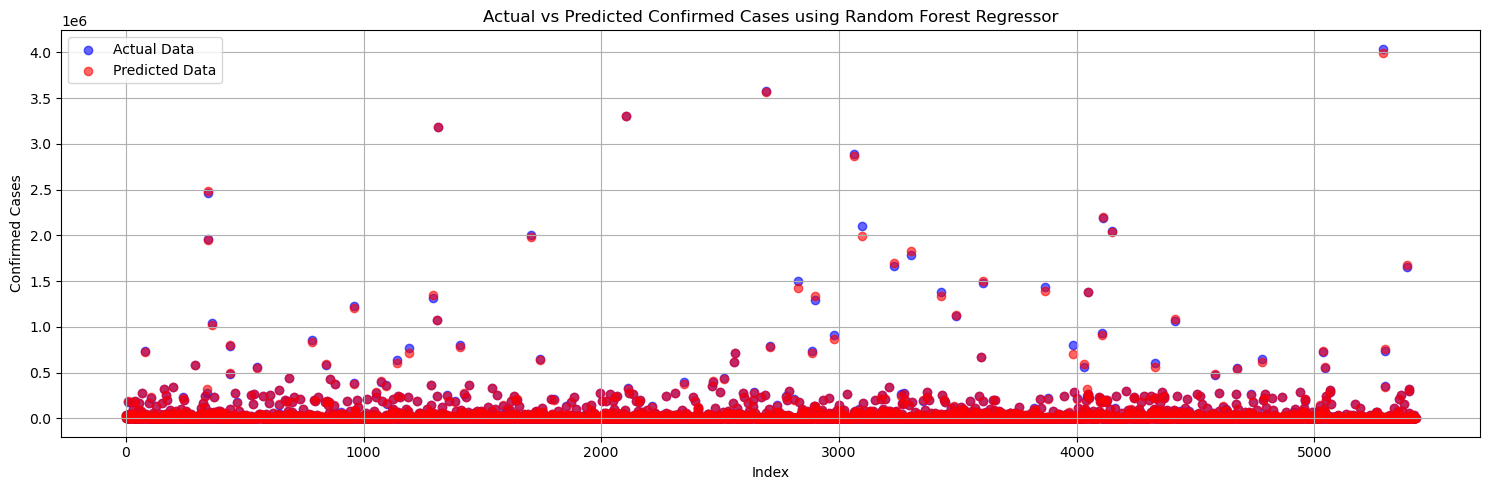

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


# Drop rows with NaN caused by lagging
df.dropna(inplace=True)

# Define Features (X) and Target (y)
features = df_drop
X = features
y = df['Confirmed']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train Random Forest Regressor             
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print Metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")



# Plot Predictions vs Actual Data
plt.figure(figsize=(15, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Data', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Data', alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Confirmed Cases using Random Forest Regressor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# Insight
- The **R-squared (R²)** value of 0.9995 demonstrates that the model explains nearly all of the variance in the target variable, indicating an almost perfect fit.  
- The **MAE** (453.53) and **RMSE** (3641.92) are relatively low given the likely scale of the target variable, suggesting strong predictive accuracy and minimal error.  
- The low difference between MAE and RMSE implies that large prediction errors are rare, further confirming the model's reliability.  
- This exceptional performance suggests that the selected features are highly effective in capturing the underlying patterns of the data.  
- While the model performs extremely well, it's worth checking for potential overfitting, especially if the dataset used for evaluation is not representative or sufficiently large.

### The scatter plot shows that the predicted values (red points) closely align with the actual values (blue points) for most data points, indicating good model performance. However, a few cases show noticeable deviations, suggesting that the model may struggle with outliers or extreme values.

In [37]:
df_drop2 = df.drop(['Date', 'Country/Region', 'WHO Region', 'Deaths', 'MonthStr'], axis=1)
df_drop2

KeyError: "['Date', 'Country/Region', 'WHO Region', 'Deaths', 'Month Str'] not found in axis"

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


# Drop rows with NaN caused by lagging
df.dropna(inplace=True)

# Define Features (X) and Target (y)
features = df_drop2
X = features
y = df['Deaths']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train Random Forest Regressor             
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print Metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Plot Predictions vs Actual Data
plt.figure(figsize=(15, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Data', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Data', alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Deaths Cases using Random Forest Regressor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'Deaths'